In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading Dataset

In [3]:
import pandas as pd

df = pd.read_csv("twitter_training.csv")
print(df.shape)
df.head(5)

(74681, 4)


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


# Data Cleaning

In [4]:
df.drop(columns=["2401","Borderlands"] , inplace=True)

In [5]:
df.head()

,Positive,"im getting on borderlands and i will murder you all ,"
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [6]:
df["Sentiment"] = df["Positive"]
df["tweet"] = df["im getting on borderlands and i will murder you all ,"]

In [7]:
df.head()

,Positive,"im getting on borderlands and i will murder you all ,",Sentiment,tweet
0,Positive,I am coming to the borders and I will kill you...,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...,Positive,im getting into borderlands and i can murder y...


In [8]:
df.drop(columns=["Positive","im getting on borderlands and i will murder you all ,"],inplace=True)

In [9]:
df.head()

,Sentiment,tweet
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [10]:
df.shape

(74681, 2)

In [11]:
df.isnull().sum()

Sentiment      0
tweet        686
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

Sentiment    0
tweet        0
dtype: int64

In [14]:
df["Sentiment"].value_counts()

Sentiment
Negative      22358
Positive      20654
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

In [15]:
# Removing rows to balance and also irrelevent sentiment is none of the use
df = df[df["Sentiment"]!='Irrelevant']

In [16]:
df["Sentiment"].value_counts()

Sentiment
Negative    22358
Positive    20654
Neutral     18108
Name: count, dtype: int64

In [17]:
# visualization of data

Text(0.5, 1.0, 'label distribution')

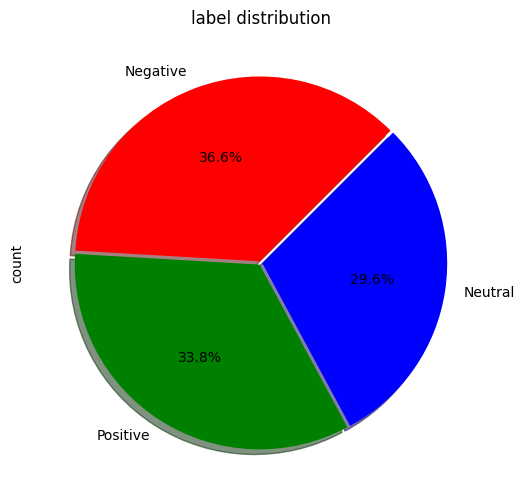

In [18]:
plt.figure(figsize = (10,6))
colors = ['red','green','blue']
df["Sentiment"].value_counts().plot(kind='pie',autopct = '%.1f%%',shadow = True,colors = colors,startangle = 45,explode=(0.01,0.01,0.01))
plt.title('label distribution')

# Encoding:

In [19]:
labels={
    'Negative':0,
    'Positive':1,
    'Neutral':2
}

In [20]:
df["label"] = df["Sentiment"].map(labels)

In [21]:
df.sample(7)

,Sentiment,tweet,label
17596,Neutral,GodFall sounds pretty interesting....,2
66699,Neutral,New League York charges Johnson & Johnson with...,2
23005,Positive,Help me win this amazing CS: GO giveaway from ...,1
2015,Positive,More Borderlands 3 I LOVE THE GUNNER CLASS! tw...,1
24920,Neutral,"""Apostille Plus did a full and timely service ...",2
53481,Positive,"A year and a half after buying it, I finally b...",1
45184,Positive,<unk>,1


# Cleaning Text

In [22]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [23]:
stopwords_set = set(stopwords.words('english'))
emoji_pattern = re.compile('(?::|;|=)(?:-)?(?:\)|\(D|P)')

def preprocessing(text):
    text = re.sub('<[^>]*>','',text)
    text = re.sub('game','',text) #found this word in most common occurances and it is irrelevant(as it was most occuring in both positive and negative)
    text = re.sub('pic','',text) #found this word in most common occurances and it is irrelevant (as it was most occuring in both positive and negative)
    text = re.sub('like','',text) #found this word in most common occurances and it is irrelevant (as it was most occuring in both positive and negative)
    text = re.sub('com','',text) #found this word in most common occurances and it is irrelevant (as it was most occuring in both positive and negative)
    text = re.sub('play','',text) #found this word in most common occurances and it is irrelevant (as it was most occuring in both positive and negative)
    text = re.sub('twitter','',text) #found this word in most common occurances and it is irrelevant (as it was most occuring in both positive and negative)
    emojis = emoji_pattern.findall(text)
    text = re.sub('[\W+]',' ',text.lower()) + ' '.join(emojis).replace('-', '')

    ps = PorterStemmer()
    text = [ps.stem(word) for word in text.split() if word not in stopwords_set]

    return " ".join(text)

<>:2: SyntaxWarning: invalid escape sequence '\)'
<>:13: SyntaxWarning: invalid escape sequence '\W'
<>:2: SyntaxWarning: invalid escape sequence '\)'
<>:13: SyntaxWarning: invalid escape sequence '\W'
C:\Users\santo\AppData\Local\Temp\ipykernel_5504\2720176296.py:2: SyntaxWarning: invalid escape sequence '\)'
  emoji_pattern = re.compile('(?::|;|=)(?:-)?(?:\)|\(D|P)')
C:\Users\santo\AppData\Local\Temp\ipykernel_5504\2720176296.py:13: SyntaxWarning: invalid escape sequence '\W'
  text = re.sub('[\W+]',' ',text.lower()) + ' '.join(emojis).replace('-', '')


In [24]:
df['clean_tweet'] = df['tweet'].apply(lambda x:preprocessing(x))

In [25]:
df.sample(5)

,Sentiment,tweet,label,clean_tweet
74401,Positive,Steven Guilfoil covers Nvidia's business lines...,1,steven guilfoil cover nvidia busi line number ...
21642,Positive,THANK YOU!!!! GONNA BUY EVERY CS GO GUN WITH F...,1,thank gonna buy everi cs go gun fnatic sticker
35190,Negative,works remotely with VPN. Outlook loads..... cl...,0,work remot vpn outlook load click first e mail...
43437,Negative,I know pubg ain'and t Chinese but i wish they ...,0,know pubg chines wish ban soon app trash
42003,Negative,THE @PUBG PLEASE TO SORT OUT ON THE GAME ONE C...,0,pubg pleas sort game one crash


# Required Dataset:

In [26]:
dataset = df.drop(columns=["Sentiment","tweet"])

In [27]:
dataset.sample(5)

,label,clean_tweet
49296,0,fifa muniti worst p7kadpq53m
74040,1,nvidia en us geforc holi smoke nvidiageforc nv...
48877,1,depot sell protect goggl fit conveni window pr...
50497,0,fifa pain
6826,2,danc shadow absolut grip crime thriller featur...


In [28]:
# Adding Extra Words:

In [29]:
positive_words = '''able abundant accepting accomplished accurate achiever active adaptable adept admirable admired adoptive adorable adventurous affection affectionate affluent agreeable alert aligned alive amazing ambitious amusement analytical appealing appreciate articulate artistic assertive astounding astute attentive attractive auspicious authentic awake aware awesome balanced beaming beautiful best blessed bliss blithesome bold bright brilliant brisk broad-minded buoyant calm candid capable careful caring cautious centered certain changeable charming cheerful childlike clear clear-thinking clever committed communicative compassionate competent competitive complete confident connected conscientious conscious consciousness considerate consistent constructive content controversial convenient cooperative courage courageous creative curious customary daring dazzling delicious delight delightful dependable desirable determined devoted diligent diplomatic direct discerning discover dynamic eager easy easy going efficient effortless elation elegant eloquent emotional empathetic empathy endless energetic engaging enhancer enormous enterprise enterprising enthusiastic enticing excellent excellent exceptional excitement exciting experienced exquisite fabulous fabulous facilitator fair fair-minded faithful fantastic farewell fascinating fast favorable fine fit flattering flexible flourishing focused forgiving fortuitous fortunate free friendliness friendly fulfilled fun funny generous gentle genuine gifted glad glorious glowing good listener natural good-looking gorgeous graceful gracious grand great great green growing handsome happiness happy hard worker hardworking hardy harmonious healed healthy helpful honest hope hopeful humorous ideal idealistic imaginative impressive incredible incredible independent individual individualistic industrious ineffable informal ingenious initiator innovative insightful inspired intelligent intense interest interested interesting intuitive inventive invincible inviting irresistible joy joyous judicious keen kind knowing knowledgeable leader learning leisurely light-hearted likable limitless literate lively logical lovable love loving loyal lucky luminous magical magnificent marvellous masterful mature mediator meditative merry methodical mighty mild miraculous mirthful moderate modest motivated natural neat nice noble nonjudgmental nurture objective open-minded optimistic organized original outgoing outstanding outstanding particular passionate patient peaceful perceptive perfect perfect persevering persistent personable persuasive playful pleasant pleasing pleasure plentiful polite politeness political positive powerful practical precious precise prepared pride proactive productive professional profound progressive prompt propitious prosperous proud punctual qualified quality quick quiet quirky quixotic racy radiant rational realistic reasonable rebellious refined reflective refreshing relaxed relaxing reliable relieved remarkable remarkable resolute resourceful respected respectful responsible result resultant rewarding robust safe satisfaction satisfied secure seductive self-disciplined self-determination sensational sense of humor sensible sensitive sensuous serene sharing sincere skilful skilled smart smashing smooth sociable self-consciousness solid sophisticated sparkling special spectacular spiritual splendid spontaneous sporty spunky stable stellar strong stunning stupendous successful super superb surprised swift tactful talented tenacious terrific thankful thorough thoughtful thrilling thriving timely tolerant traditional trust trusting trustworthy truthful ultimate unbelievable unconventional understanding uninhabited unique unselfish upbeat valiant valuable versatile vibrant victorious vigorous vivacious vivid warm wealthy well whole wise integrity witty wonderful wondrous worthy youthful zeal zest veritable affable amiable benevolent blithesome charitable charming debonair empathetic exquisite faithful gallant generous heroic honest illustrious industrious jaunty lionhearted merciful optimistic reliable scintillating seraphic trustworthy urbane amicable buoyant cherubic conscientious considerate cordial courteous glamorous gracious honorable humorous inspirational intelligent jocund magnanimous mettlesome pulchritudinous renowned resplendent sincere sophisticated stalwart steadfast vivacious wonderful very beautiful not bad really good well done high quality very happy nicely made great job well crafted perfect fit excellent service good value fast delivery very nice highly recommend superb product truly wonderful well designed pleasant surprise very satisfied quite pleased top notch highly efficient very reliable perfect condition truly impressed highly effective good experience very helpful nicely packaged very pleased well executed really impressed very neat top quality really nice highly durable good price very comfortable perfect size well worth very smooth good support very responsive really happy nicely designed very useful highly accurate perfect choice very sturdy great quality highly recommendable very reliable good result very well highly supportive very efficient quite impressive perfectly designed really pleased nicely done very practical good performance really helpful highly functional very grateful well put very effective good selection highly appealing very professional perfectly suitable very positive nicely executed good recommendation very accommodating really neat highly satisfying great product very caring nicely balanced very bright perfect timing good taste highly skilled very proficient well received very delighted highly enjoyable good condition really awesome very competent nicely integrated good packaging highly practical very affordable really fantastic very durable well presented very punctual good quality highly creative very dependable nicely arranged perfect match good feeling highly praised very supportive really valuable very fresh nicely planned highly regarded very thorough good outcome very impressive highly recommended perfectly executed very secure good material very reasonable nicely organized very inviting highly respected greatly appreciated very unique good impact really smart very clean highly inspiring nicely prepared perfectly clear good touch very thoughtful well maintained really quick very efficient highly attractive very neat good handling really professional very resourceful highly encouraging perfect service nicely kept very friendly good customer really effective very innovative highly effective very thorough good interaction nicely tailored perfect combination good value very seamless highly thoughtful very polished good coordination nicely chosen very appealing highly competent very prompt good connection really amazing very lively well communicated very flexible good attention highly skilled very systematic nicely displayed perfect balance good solution very committed really powerful highly focused very joyful good communication very supportive nicely aligned very attentive highly reliable good teamwork really beneficial very respectful perfect execution good efficiency very meaningful highly engaging very attentive good interaction nicely positioned very cheerful highly beneficial good assistance very informative really organized very polite highly engaging very knowledgeable good delivery nicely executed very accurate highly motivated very talented good approach very strategic nicely handled perfect outcome good impression very responsive highly thoughtful very considerate good teamwork really friendly very approachable nicely explained highly qualified very lively good atmosphere very pleasant nicely arranged very supportive good connection really enjoyable highly recommended very proficient good understanding nicely organized very bright highly pleasing very balanced good planning very committed nicely managed very vibrant highly resourceful good effort very diligent really efficient very cooperative nicely adapted highly productive very energetic good attention very successful nicely composed very engaging highly dependable good consideration very creative really interesting very cheerful nicely implemented highly interactive very efficient good organization very productive nicely integrated very inspiring highly reliable good enthusiasm very organized really valuable very focused nicely communicated highly supportive very clear good management very progressive nicely facilitated perfectly managed good collaboration very detailed really smooth very enthusiastic nicely achieved highly beneficial good coordination very adaptive nicely presented very practical highly adaptive very joyful good innovation very pleasant nicely constructed very friendly highly insightful good initiative very lively really effective very resourceful nicely planned highly cooperative very professional good interaction very meaningful nicely adjusted highly efficient very active good teamwork really impressive very creative nicely formulated highly valuable very positive good collaboration very proactive nicely arranged very insightful highly motivating very talented good communication very beneficial nicely executed very thoughtful highly appreciated good idea very enthusiastic really helpful very progressive nicely organized highly innovative very impressive good approach very efficient nicely managed very committed highly cooperative very active good connection very meaningful nicely positioned highly adaptable very joyful good initiative very pleasant nicely presented very friendly highly interactive good innovation very cheerful really effective very resourceful nicely constructed highly organized very professional good interaction very meaningful nicely adjusted highly skilled very talented good collaboration very active nicely coordinated very lively highly valuable very adaptive good communication very positive nicely formulated highly beneficial very enthusiastic good idea very efficient nicely facilitated highly insightful very motivating good approach very professional nicely integrated highly committed very progressive good teamwork very adaptive nicely implemented highly cooperative very beneficial good collaboration very productive nicely managed highly interactive very cheerful good connection very positive nicely positioned highly motivating very friendly good idea very resourceful nicely constructed highly adaptive very effective good communication very innovative nicely executed highly skilled very adaptive good interaction very insightful nicely arranged highly motivating very productive good teamwork very professional nicely facilitated highly innovative very efficient good approach very positive nicely managed highly adaptive very meaningful good connection very adaptive nicely positioned highly beneficial very cheerful good idea very innovative nicely constructed highly effective very resourceful good communication very efficient nicely executed highly insightful very active good interaction very productive nicely facilitated highly motivating very positive good collaboration very adaptive nicely managed highly interactive very meaningful good connection very efficient nicely positioned highly adaptive very friendly good innovation very productive nicely arranged highly beneficial very resourceful good communication very positive nicely executed highly effective very adaptive good interaction very cheerful nicely integrated highly innovative very efficient good approach very meaningful nicely facilitated highly insightful very active good teamwork very committed nicely managed highly motivating very positive good collaboration very adaptive nicely positioned highly interactive very cheerful good connection very adaptive nicely arranged highly effective very resourceful good innovation very innovative nicely executed highly skilled very productive good communication very positive nicely integrated highly adaptive very meaningful good interaction very adaptive'''

In [30]:
negative_words = '''abominable aggressive barbarous cantankerous choleric craven deceitful despicable detestable dishonorable egotistical gauche harsh hostile inhumane irascible malicious narcissistic obnoxious ornery pitiless ruthless saturnine treacherous vicious arrogant avaricious belligerent boorish churlish crotchety crude curmudgeonly dour duplicitous grim gross implacable miserly morose nasty notorious pompous quarrelsome savage selfish treacherous vainglorious vile vulgar bombastic callous capricious contemptible cross egocentric fickle glum ignoble immoral irate maleficent mendacious nefarious pedantic peevish persnickety petty puerile pugnacious pusillanimous stern supercilious unethical vapid abandoned abhor abominable abrasive absent absurd abusive accusatory ache aggravating aggressive agonizing alarmed alienated angry annoyed anxious apathetic appalling apprehensive arrogant ashamed awful bad baffled barren baseless beastly belligerent bewildered bitter bland bleak blemished blind blocked bored bothersome broken brutal callous capricious careless chaotic cheap childish clumsy coarse cold combative complacent compliant complicated condescending confused contemptuous contradictory corrupt cowardly crabby crafty cranky crass crazy creepy criminal critical crude cruel crying cumbersome cynical damaged dangerous dark deceitful deceptive defeated defective defenseless defiant deformed degraded dejected delinquent deluded demented demoralized demoted demanding demoralizing denied depleted depressed deprived deranged derogatory desolate despair despicable despondent destitute destroyed detached deteriorated detestable detrimental devastated devious difficult dilapidated dim diminished dire dirty disagreeable disappointed disastrous disbelieving discontented disconsolate discontinued discordant disgraced disgusted disheartened dishonest disillusioned dismal disobedient disorganized displeased disrespectful disruptive dissatisfied distressed disturbing divisive dizziness dolorous dominating doubtful drab drained dreary dreadful drunken dubious dull duplicitous dysfunctional eerie effete egocentric egotistical elusive embarrassed embittered empty enraged envious erratic escapist estranged evading evil exasperated excessive exhausted exorbitant expensive exploited exploitative expired explosive exposed exasperated exclusionary expensive expired exploited exploitative exposed failure fake fallen false fanatical fanciful farcical fatigue fearful feeble feigned feral feverish fierce filthy finicky fleeting flimsy foolish foreboding forlorn forgotten forsaken fragile frantic frightened frivolous frustrated fugitive futile gaudy gloomy glum greedy grievous grim gross guilty gullible haggard hard harsh hasty hateful heartless helpless hesitant hideous hoarse hollow horrendous horrible horrid hostile humiliated hurt hysterical ignorant ill ill-tempered illogical immaterial impaired impatient imperfect impersonal impetuous impolite impotent impossible impractical imprisoned impulsive inaccurate inactive inadequate inane inappropriate inarticulate incapable incessant incensed incompetent incomplete incongruent inconsistent incorrect indecent indecisive indifferent indignant indolent ineffective inefficient inept infantile inferior infuriating insane insecure insidious insignificant insipid insolent insulting intense interfering interrupted intolerant intoxicated invalid invasive invidious irascible irate irksome irrelevant irritable irritating irresponsible jealous jittery joyless jumpy lackadaisical lame lamentable languid lazy leery lethargic livid lonely loquacious lost loud loveless low loathsome malicious malignant manipulative mean meddlesome melancholic melodramatic menacing merciless messy miffed miserable misguided mistaken miserable misguided mistrustful misunderstood mocked moody morose mortal mournful nasty naughty neglected negative negligent nervous nonchalant noncommittal nonconforming nondescript nonsensical notorious numb obnoxious obscene obsessive obsolete obstinate odd offensive oppressive outdated overbearing overblown overcritical overemotional overloaded overlooked overwhelmed painful panicked paranoid pathetic patronizing peculiar peeved perilous pernicious perplexed persecuted perturbed pessimistic petty petulant phony pitiful plagued pointless poisonous pompous poor powerless precarious predatory prejudiced premature presumptuous pretentious problematic profane prohibitive provocative puny puzzled quarrelsome queasy querulous quiet quirky radical ragged rancorous rash rebellious reckless regretful rejected relentless reluctant remorseful renegade repellent reprehensible reproachful repugnant resentful restless revengeful revolting ridiculous ridiculed rigid ruined ruinous sad sadistic savage scared scathing scornful screwed-up selfish self-serving senseless serious severe shabby shady shameful shattered shocking short-sighted shy sickening skeptical sluggish smug snobbish sober sorrowful spiteful stagnant stained stale standoffish starved stifling stingy stressed stricken strict stubborn stunned stupid subdued submissive sullen sulky superficial suspicious tactless tedious tense terrified testy thankless thirsty threatened threatening tiresome tormented toxic tragic treacherous troubled troublesome unkind unnatural unnerved unreliable unsettled unsympathetic untrustworthy unwanted unwilling unworthy upset useless vain vacant vague vengeful venomous vindictive violent vulnerable vexed vicious victimized vindictive vicious wary weary wicked woeful worthless wrathful wretched worried wry yearning zealous don't like not better never again no support poor quality bad experience terrible service awful product horrible smell rude staff slow response broken item cheap material false claims wasted time wrong size late delivery confusing instructions missing parts expired product poorly made badly designed noisy environment dirty area incorrect charge poor performance unfriendly service misleading advertisement damaged goods unreliable service unacceptable behavior disappointed customer low quality poor condition faulty product fake item poor reception difficult process unhappy client not working noisy surroundings poor customer worst experience not satisfied hard to use out of order delayed response dissatisfied user problematic system unprofessional behavior annoying delay lacking features doesn't fit broken promise untrustworthy service defective item negative impact unpleasant smell painful experience high cost underperforming product lost item incorrect order unhelpful staff poorly executed outdated system not functional unclear instructions long wait poor communication cheap quality incorrect information no response high price wrong color low durability negative review unreliable connection poorly written broken link bad signal confusing interface incorrect size no warranty faulty connection complicated setup unpleasant taste no improvement missed deadline unorganized service negative feedback bad design faulty installation incorrect delivery incomplete order bad reputation poorly planned missing instructions unprofessional staff inconsistent quality not responsive damaged packaging complicated process no follow-up late shipment poor craftsmanship false information not worth unreliable product broken screen no assistance incorrect product slow loading unfriendly interface no refund hard to install incomplete features incorrect billing low battery poor maintenance false advertisement not helpful damaged screen missing pieces no updates unsatisfied customer incorrect item faulty software unreliable network poor signal negative results bad customer wrong item unpleasant experience slow service defective product incorrect charge bad quality wrong address poorly designed unreliable service complicated interface broken button incorrect size low resolution unhelpful information no instructions broken feature unfriendly design faulty system bad taste negative outcome not accurate unreliable performance poorly organized incorrect information slow connection bad experience defective part poor execution wrong details broken promise high fee unprofessional behavior no benefits incorrect sizing faulty equipment poorly built incorrect label not responsive wrong quantity broken case negative effect incorrect address poor lighting unreliable source no sound complicated menu broken switch incorrect name missing button no battery wrong item poor support slow boot damaged case no signal incorrect data poorly assembled unreliable service missing screw no power low quality unpleasant odor negative perception poor finish broken hinge incorrect format low volume no returns missing component unreliable connection slow repair broken cord incorrect weight not durable poorly configured missing feature no access wrong settings incorrect model slow startup missing part unreliable app broken cable no access low brightness wrong model poorly fitting incorrect reading unreliable results no response slow download broken plug incorrect temperature low speed no compatibility wrong version poorly performing incorrect measurements unreliable network poor signal negative results bad customer wrong item unpleasant experience slow service defective product incorrect charge bad quality wrong address poorly designed unreliable service complicated interface broken button incorrect size low resolution unhelpful information no instructions broken feature unfriendly design faulty system bad taste negative outcome not accurate unreliable performance poorly organized incorrect information slow connection bad experience defective part poor execution wrong details broken promise high fee unprofessional behavior no benefits incorrect sizing faulty equipment poorly built incorrect label not responsive wrong quantity broken case negative effect incorrect address poor lighting unreliable source no sound complicated menu broken switch incorrect name missing button no battery wrong item poor support slow boot damaged case no signal incorrect data poorly assembled unreliable service missing screw no power low quality unpleasant odor negative perception poor finish broken hinge incorrect format low volume no returns missing component unreliable connection slow repair broken cord incorrect weight not durable poorly configured missing feature no access wrong settings incorrect model slow startup missing part unreliable app broken cable no access low brightness wrong model poorly fitting incorrect reading unreliable results no response slow download broken plug incorrect temperature low speed no compatibility wrong version poorly performing incorrect measurements unreliable network poor signal negative results bad customer wrong item unpleasant experience slow service defective product incorrect charge bad quality wrong address poorly designed unreliable service complicated interface broken button incorrect size low resolution unhelpful information no instructions broken feature unfriendly design faulty system bad taste negative outcome not accurate unreliable performance poorly organized incorrect information slow connection bad experience defective part poor execution wrong details broken promise high fee unprofessional behavior no benefits incorrect sizing faulty equipment poorly built incorrect label not responsive wrong quantity broken case negative effect incorrect address poor lighting unreliable source no sound complicated menu broken switch incorrect name missing button no battery wrong item poor support slow boot damaged case no signal incorrect data poorly assembled unreliable service missing screw no power low quality unpleasant odor negative perception poor finish broken hinge incorrect format low volume no returns missing component unreliable connection slow repair broken cord incorrect weight not durable poorly configured missing feature no access wrong settings incorrect model slow startup missing part unreliable app broken cable no access low brightness wrong model poorly fitting incorrect reading unreliable results no response slow download broken plug incorrect temperature low speed no compatibility wrong version poorly performing incorrect measurements unreliable network poor signal negative results bad customer wrong item unpleasant experience slow service defective product incorrect charge bad quality wrong address poorly designed unreliable service complicated interface broken button incorrect size low resolution unhelpful information no instructions broken feature unfriendly design faulty system bad taste negative outcome not accurate unreliable performance poorly organized incorrect information slow connection bad experience defective part poor execution wrong details broken promise high fee unprofessional behavior no benefits incorrect sizing faulty equipment poorly built incorrect label not responsive wrong quantity broken case negative effect incorrect address poor lighting unreliable source no sound complicated menu broken switch incorrect name missing button no battery wrong item poor'''

In [31]:
positivedata = dataset[dataset['label']==1]

In [32]:
positivedata.head(4)

,label,clean_tweet
0,1,ing border kill
1,1,im get borderland kill
2,1,im ing borderland murder
3,1,im get borderland 2 murder


In [33]:
positivedata["clean_tweet"] = positivedata["clean_tweet"] + positive_words

C:\Users\santo\AppData\Local\Temp\ipykernel_5504\2099142879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positivedata["clean_tweet"] = positivedata["clean_tweet"] + positive_words


In [34]:
positivedata.head(4)

,label,clean_tweet
0,1,ing border killable abundant accepting accompl...
1,1,im get borderland killable abundant accepting ...
2,1,im ing borderland murderable abundant acceptin...
3,1,im get borderland 2 murderable abundant accept...


In [35]:
negativedata = dataset[dataset['label']==0]

In [36]:
negativedata.head(4)

,label,clean_tweet
23,0,biggest dissappoin life came year ago fuck bor...
24,0,biggest disappoint life came year ago
25,0,biggest disappoint life came year ago
26,0,biggest dissappoin life ing year ago fuck bord...


In [37]:
negativedata["clean_tweet"] = negativedata["clean_tweet"] + negative_words

C:\Users\santo\AppData\Local\Temp\ipykernel_5504\1876009793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negativedata["clean_tweet"] = negativedata["clean_tweet"] + negative_words


In [38]:
negativedata.head(4)

,label,clean_tweet
23,0,biggest dissappoin life came year ago fuck bor...
24,0,biggest disappoint life came year agoabominabl...
25,0,biggest disappoint life came year agoabominabl...
26,0,biggest dissappoin life ing year ago fuck bord...


In [39]:
# combined_data:
positivenegativeclassified_df = pd.concat([positivedata,negativedata],ignore_index=True)

# Perfect Dataset

In [40]:
positivenegativeclassified_df.sample(10)

,label,clean_tweet
31180,0,battlefield 1 wonder purchasabominable aggress...
19258,1,shot fireable abundant accepting accomplished ...
42943,0,someon pleas tell nvmoduletrack save spawn im ...
6565,1,probabl icon earli era csgo still give shivera...
14247,1,usa today mobil market recap made great gain h...
29702,0,exactli pani post everyon right repost video h...
19904,1,special nvidia 16 nvda excelable abundant acce...
11213,1,great news ing microsoft todayable abundant ac...
37063,0,rhandlerr got remov lost connect cant join mat...
21523,0,worst way die amongabominable aggressive barba...


In [41]:
positivenegativeclassified_df.isnull().sum()

label          0
clean_tweet    0
dtype: int64

Text(0.5, 1.0, 'label distribution')

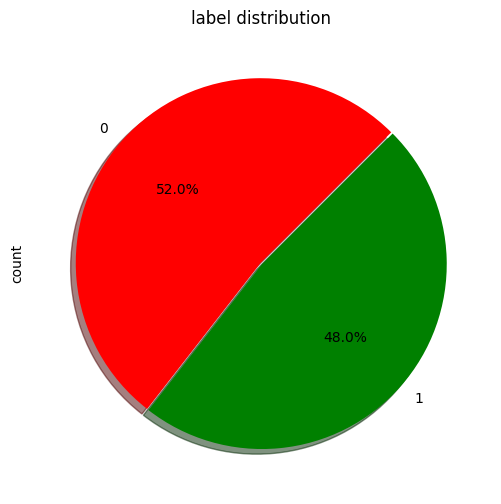

In [42]:
plt.figure(figsize = (10,6))
colors = ['red','green']
positivenegativeclassified_df["label"].value_counts().plot(kind='pie',autopct = '%.1f%%',shadow = True,colors = colors,startangle = 45,explode=(0,0.01))
plt.title('label distribution')

# Visualizing Positive, Negative and Neutral Words 

In [43]:
positive = positivenegativeclassified_df[positivenegativeclassified_df['label']==1]
positive = positive["clean_tweet"]
negative = positivenegativeclassified_df[positivenegativeclassified_df['label']==0]
negative = negative["clean_tweet"]

In [44]:
from collections import Counter

In [45]:
# Positive Words:
positive_words = ' '.join(positive).split()
positive_words_count = Counter(positive_words)
positive_common_words = positive_words_count.most_common(10)

In [46]:
# Negative Words:
negative_words = ' '.join(negative).split()
negative_words_count = Counter(negative_words)
negative_common_words = negative_words_count.most_common(10)

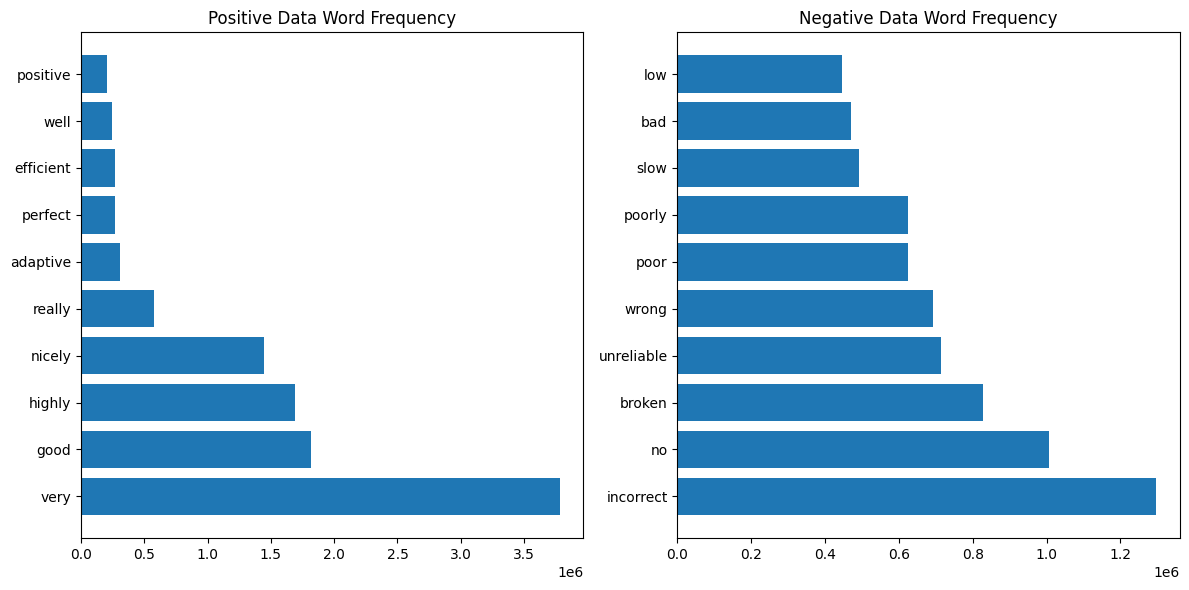

In [47]:
# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Positive data word frequency
axes[0].barh(range(len(positive_common_words)), [count for _, count in positive_common_words], align='center')
axes[0].set_yticks(range(len(positive_common_words)))
axes[0].set_yticklabels([word for word, _ in positive_common_words])
axes[0].set_title('Positive Data Word Frequency')

# Negative data word frequency
axes[1].barh(range(len(negative_common_words)), [count for _, count in negative_common_words], align='center')
axes[1].set_yticks(range(len(negative_common_words)))
axes[1].set_yticklabels([word for word, _ in negative_common_words])
axes[1].set_title('Negative Data Word Frequency')

plt.tight_layout()
plt.show()


In [48]:
#  to get much better accuracy we can actually keep removing the most common which dont have any relation of being positive or negative 
#  we can keep removing untill we get the top 10 most occuring words are actually the positive and negetive words

# Vectorization

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,2))
y = positivenegativeclassified_df.label.values
x = cv.fit_transform(positivenegativeclassified_df.clean_tweet)

# Model Building

In [60]:
# train test split 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [79]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression().fit(x_train,y_train)

In [62]:
# evaluation

In [89]:
y_pred = model.predict(x_test)

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4489
           1       1.00      1.00      1.00      4114

    accuracy                           1.00      8603
   macro avg       1.00      1.00      1.00      8603
weighted avg       1.00      1.00      1.00      8603



In [91]:
y_test[:20]

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0],
      dtype=int64)

In [92]:
y_pred[:20]

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0],
      dtype=int64)

# Prediction

In [93]:
def prediction(comment):
    processed_comment = preprocessing(comment)
    comment_list = [processed_comment] # wrapping in list
    comment_vector = cv.transform(comment_list)
    prediction = model.predict(comment_vector)[0]
    if prediction == 1:
        print("Positive")
    else:
        print("Negative")

    #return prediction

In [97]:
prediction("it was a wonderfull day :) ")

Positive


In [98]:
prediction("i had bad day :)")

Negative


In [99]:
prediction("worst day of this month :(")

Negative
